In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

サイコロを100回振った時に1が出る確率は理想的なサイコロの場合1/6なので、$p=1/6$の二項分布で計算できます。
`np.random.binomial(n,p)`で乱数を振ることができます
https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

次のセルを何回か実行してみてください

In [7]:
n_throw = 100
p_true = 1./6.
np.random.binomial(n_throw, p_true)

26

同じことを100万回繰り返してみましょう。`np.random.binomial`の3つめの引数が試行回数です

In [9]:
n_exp = 1000000
n1 = np.random.binomial(n_throw, p_true, n_exp)

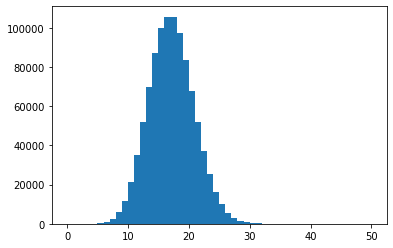

In [26]:
plt.hist(n1, bins=50, range=(0,50));

26以上となる確率はどれくらいでしょうか？

In [27]:
np.sum(n1 >= 26) / n_exp

0.01197

例えば手元にあるサイコロで $n_1^\mathrm{data} = 26$ の結果を得た場合、これ以上の値を得る確率が5%以上の$p_\mathrm{true}$の範囲を探してみましょう

In [51]:
n1_data = 26

p_true = 0.189
n_exp = 1000000
n1 = np.random.binomial(n_throw, p_true, n_exp)

print("p_true = %g で n1 >= %d となる確率は %g" % (p_true, n1_data, np.sum(n1 >= n1_data)/n_exp))

p_true = 0.189 で n1 >= 26 となる確率は 0.049874


今度は逆に実験結果以下の値を得る確率が5%以上の$p_\mathrm{true}$の範囲を探してみましょう

In [62]:
p_true = 0.342
n1 = np.random.binomial(n_throw, p_true, n_exp)
print("p_true = %g で n1 <= %d となる確率は %g" % (p_true, n1_data, np.sum(n1 <= n1_data)/n_exp))

p_true = 0.342 で n1 <= 26 となる確率は 0.050046


この範囲が被っている領域（ちょうど5%になる値の間の区間）がある意味$p_\mathrm{true}$が信頼できる区間と言えるでしょう。意外と広いですよね。

ちなみに大雑把な計算ができるのも便利です。全体のうち結果が得られた数が比較的少ない場合（例えば100回のうち26回）、大体少ない数の平方根くらいの誤差がつきます。ここでは$26\pm\sqrt{26} \approx 26 \pm 5 = \{21,31\}$となり、確率の信頼区間（上の5%とは定義が変わりますが）は$0.21 \sim 0.31$と考えられます。

スライドで見せたような図を作りたい人はいくつかの$p_\mathrm{true}$で試した結果を保存して図を作るか、あるいは
二項分布の場合はわざわざ乱数を振らなくてもいろんな確率が分かっているので、そのあたりを調べてみると面白いと思います。